# Introduction

On April 10th, 1912, the RMS Titanic departed on its maiden voyage from Southampton to New York City. After making stops in Cherbourg and Queenstown to pick up additional passengers, the ship headed towards New York. There were 2,224 passengers including 892 crew members aboard the ship. This was under the ship’s capacity of around 3,300. The ship was equipped with watertight compartments that were designed to fill up in the event of a breach to the ship’s hull. This technology was said to make the ship “unsinkable”.

The Titanic was scheduled to arrive at New York Pier 59 on the morning of April 17th. But at around 11:40 p.m. on the night of April 14th, the ship collided with an iceberg. The ship’s hull was not punctured by the collision, however it weakened the seams of the hull causing them to separate. Several watertight compartments filled with water and the ship eventually sank in the Atlantic Ocean about 400 miles off the coast of Newfoundland.

Distress signals were sent out, but no ships were near enough to reach the Titanic before she sank. At around 4 a.m., the the RMS Carpathia arrived on scene in response to the distress signals The ship had 20 lifeboats which had capacity for only 1,178 passengers. Approximately 1,500 people lost their lives in this tragic event. About 710 people survived and were taken to New York via the Carpathia.

So, who were the passengers that survived this tragedy? Fortunately, we have data which can give us insight into who survived and who perished. The goal is to use machine learning methods to identify patterns in the data to predict which passengers survived and which ones did not.


# The Dataset
The Titanic dataset comes from kaggle. The training set contains **891 rows and 12 columns** with one row per passenger. The test set includes 418 rows and 11 columns (the survived column is missing for the sake of the competition).

The columns of the test set are:
* **PassengerId**: Kaggle passenger id
* **Survived**: 1 = passenger survived, 0 = passenger did not survive
* **Pclass**: Ticket class
* **Name**: Full name of passenger including title
* **Sex**: Sex of passenger
* **Age**: Age of passenger
* **SibSp**: Number of siblings and spouses aboard the ship
* **Parch**: Number of parents and children aboard the ship
* **Ticket**: Ticket number
* **Fare**: Passenger fare
* **Cabin**: Cabin number
* **Embarked**: Port of embarkation

# Goal of Analysis


sources: 
* https://en.wikipedia.org/wiki/RMS_Titanic
* https://www.kaggle.com/c/titanic/data

# Load the standard Libraries
First, load the standard python libraries.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

# Import Data
Next, we import the training data from the *train.csv* file and save it as **data**. After the data is loaded into our jupyter notebook, we convert it into a pandas dataframe and inspect it. 

In [4]:
# import train data and save it as data
data = pd.read_csv('train.csv')

# load data into a pandas dataframe and save as df
df = pd.DataFrame(data)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Exploration
Now that the data is loaded, we can begin exploration. The data has already been split into training and test sets. We will explore the training set and act as if the test set is not available to us at this time. This will allow us to get a better measure of the accuracy our model and avoid overfitting.

The describe function is used to view summaries of the numerical columns in the dataset. This also helps to indentify columns with null values. Notice the count of Age compared to the other columns.

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The corr method calculates the correlation between variables. 

In [7]:
c = df.corr()
c

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [6]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

### Explore Age

In [1]:
# Unique values for age
df.Age.unique()

NameError: name 'df' is not defined

In [ ]:
# distribution of passengers by age
df.groupby(pd.qcut(df['Age'],10))['Survived'].mean().plot(figsize=(8,6), kind='bar', color='blue', alpha=.2)

### Explore P Class

In [8]:
df['Pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
df.groupby('Pclass').describe()

Age                                                       Fare  \
        count       mean        std   min   25%   50%   75%   max  count   
Pclass                                                                     
1       186.0  38.233441  14.802856  0.92  27.0  37.0  49.0  80.0  216.0   
2       173.0  29.877630  14.001077  0.67  23.0  29.0  36.0  70.0  184.0   
3       355.0  25.140620  12.495398  0.42  18.0  24.0  32.0  74.0  491.0   

                  ...  SibSp      Survived                                     \
             mean ...    75%  max    count      mean       std  min  25%  50%   
Pclass            ...                                                           
1       84.154687 ...    1.0  3.0    216.0  0.629630  0.484026  0.0  0.0  1.0   
2       20.662183 ...    1.0  3.0    184.0  0.472826  0.500623  0.0  0.0  0.0   
3       13.675550 ...    1.0  8.0    491.0  0.242363  0.428949  0.0  0.0  0.0   

                  
        75%  max  
Pclass            
1       1.0  1.0  
2       1.0  1.0  
3       0.0  1.0  

[3 rows x 48 columns]

In [ ]:
df.groupby('Pclass')['Survived'].mean().plot(kind='bar',width=0.8)

### Survivors by Embarked Location

In [11]:
df['Embarked'].value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [12]:
df.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

### Crosstab of Class and Embarked Location

In [13]:
pd.crosstab(df['Pclass'],df['Embarked'])

Embarked,C,Q,S
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


# Feature Engineering
#### Age Binning

In [50]:
df['age_bin'] = pd.qcut(df['Age'],10)

In [51]:
pd.crosstab(df['age_bin'],df['SibSp'])

SibSp,0,1,2,3,4,5
age_bin,,,,,,
"(0.419, 14.0]",20,24,6,7,16,4
"(14.0, 19.0]",60,20,3,1,2,1
"(19.0, 22.0]",55,9,3,0,0,0
"(22.0, 25.0]",48,15,5,2,0,0
"(25.0, 28.0]",45,14,2,0,0,0
"(28.0, 31.8]",47,18,0,1,0,0
"(31.8, 36.0]",63,26,1,1,0,0
"(36.0, 41.0]",34,17,2,0,0,0
"(41.0, 50.0]",50,26,2,0,0,0


In [59]:
pd.crosstab(df['Title'],df['family_members'])

family_members,0,1,2,3,4,5,6,7,10
Title,,,,,,,,,
Capt.,0,0,1,0,0,0,0,0,0
Col.,2,0,0,0,0,0,0,0,0
Don.,1,0,0,0,0,0,0,0,0
Dr.,5,0,2,0,0,0,0,0,0
Jonkheer.,1,0,0,0,0,0,0,0,0
Lady.,0,1,0,0,0,0,0,0,0
Major.,2,0,0,0,0,0,0,0,0
Master.,0,3,15,4,2,9,3,3,1
Miss.,100,27,22,10,9,4,6,1,3


In [53]:
pd.crosstab(df['Parch'],df['SibSp'])

SibSp,0,1,2,3,4,5,8
Parch,,,,,,,
0,537,123,16,2,0,0,0
1,38,57,7,7,9,0,0
2,29,19,4,7,9,5,7
3,1,3,1,0,0,0,0
4,1,3,0,0,0,0,0
5,2,3,0,0,0,0,0
6,0,1,0,0,0,0,0


In [54]:
df['family_members']=df['Parch']+df['SibSp']

In [56]:
df.groupby('family_members')['Survived'].agg(['mean', 'size'])

,mean,size
family_members,,
0,0.303538,537
1,0.552795,161
2,0.578431,102
3,0.724138,29
4,0.200000,15
5,0.136364,22
6,0.333333,12
7,0.000000,6
10,0.000000,7


In [15]:
df.groupby('age_bin')['Survived'].mean()

age_bin
(0.419, 4.0]      0.675000
(4.0, 14.0]       0.486486
(14.0, 17.0]      0.444444
(17.0, 19.0]      0.352941
(19.0, 20.125]    0.200000
(20.125, 22.0]    0.307692
(22.0, 24.0]      0.434783
(24.0, 25.0]      0.250000
(25.0, 27.0]      0.472222
(27.0, 28.0]      0.280000
(28.0, 30.0]      0.382979
(30.0, 31.8]      0.421053
(31.8, 34.0]      0.440000
(34.0, 36.0]      0.536585
(36.0, 38.0]      0.333333
(38.0, 41.0]      0.371429
(41.0, 45.0]      0.384615
(45.0, 50.0]      0.410256
(50.0, 56.0]      0.413793
(56.0, 80.0]      0.285714
Name: Survived, dtype: float64

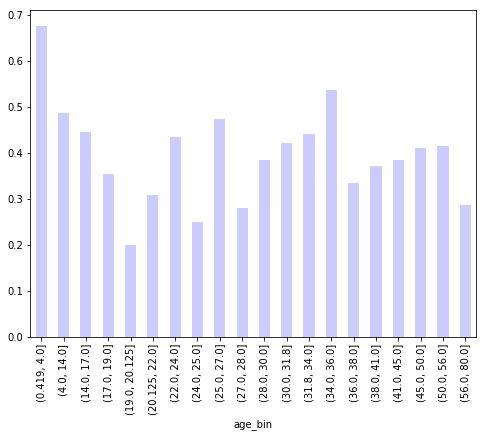

In [16]:
df.groupby('age_bin')['Survived'].mean().plot(figsize=(8,6), kind='bar', color='blue', alpha=.2)
#plt.xticks(range(len(corr.columns)), corr.columns)

In [18]:
# sns.boxplot(x="age_bin")

#### Get Title From Name

In [19]:
s=df['Name'][0]

In [20]:
s.split(', ', 1)[1].split(' ',1)[0]

'Mr.'

In [21]:
df['Title'] = df['Name'].apply(lambda s: s.split(', ', 1)[1].split(' ',1)[0])

In [22]:
#s=df['Name'].str.split(', ', 1)

In [23]:
df.groupby('Title').describe()

Age                                                          \
           count       mean        std    min     25%   50%    75%   max   
Title                                                                      
Capt.        1.0  70.000000        NaN  70.00  70.000  70.0  70.00  70.0   
Col.         2.0  58.000000   2.828427  56.00  57.000  58.0  59.00  60.0   
Don.         1.0  40.000000        NaN  40.00  40.000  40.0  40.00  40.0   
Dr.          6.0  42.000000  12.016655  23.00  35.000  46.5  49.75  54.0   
Jonkheer.    1.0  38.000000        NaN  38.00  38.000  38.0  38.00  38.0   
Lady.        1.0  48.000000        NaN  48.00  48.000  48.0  48.00  48.0   
Major.       2.0  48.500000   4.949747  45.00  46.750  48.5  50.25  52.0   
Master.     36.0   4.574167   3.619872   0.42   1.000   3.5   8.00  12.0   
Miss.      146.0  21.773973  12.990292   0.75  14.125  21.0  30.00  63.0   
Mlle.        2.0  24.000000   0.000000  24.00  24.000  24.0  24.00  24.0   
Mme.         1.0  24.000000        NaN  24.00  24.000  24.0  24.00  24.0   
Mr.        398.0  32.368090  12.708793  11.00  23.000  30.0  39.00  80.0   
Mrs.       108.0  35.898148  11.433628  14.00  27.750  35.0  44.00  63.0   
Ms.          1.0  28.000000        NaN  28.00  28.000  28.0  28.00  28.0   
Rev.         6.0  43.166667  13.136463  27.00  31.500  46.5  53.25  57.0   
Sir.         1.0  49.000000        NaN  49.00  49.000  49.0  49.00  49.0   
the          1.0  33.000000        NaN  33.00  33.000  33.0  33.00  33.0   

            Fare            ...  SibSp      Survived                           \
           count       mean ...    75%  max    count      mean       std  min   
Title                       ...                                                 
Capt.        1.0  71.000000 ...    1.0  1.0      1.0  0.000000       NaN  0.0   
Col.         2.0  31.025000 ...    0.0  0.0      2.0  0.500000  0.707107  0.0   
Don.         1.0  27.720800 ...    0.0  0.0      1.0  0.000000       NaN  0.0   
Dr.          7.0  49.168457 ...    1.0  2.0      7.0  0.428571  0.534522  0.0   
Jonkheer.    1.0   0.000000 ...    0.0  0.0      1.0  0.000000       NaN  0.0   
Lady.        1.0  39.600000 ...    1.0  1.0      1.0  1.000000       NaN  1.0   
Major.       2.0  28.525000 ...    0.0  0.0      2.0  0.500000  0.707107  0.0   
Master.     40.0  34.703125 ...    4.0  8.0     40.0  0.575000  0.500641  0.0   
Miss.      182.0  43.797873 ...    1.0  8.0    182.0  0.697802  0.460477  0.0   
Mlle.        2.0  59.402100 ...    0.0  0.0      2.0  1.000000  0.000000  1.0   
Mme.         1.0  69.300000 ...    0.0  0.0      1.0  1.000000       NaN  1.0   
Mr.        517.0  24.441560 ...    0.0  8.0    517.0  0.156673  0.363844  0.0   
Mrs.       125.0  45.138533 ...    1.0  3.0    125.0  0.792000  0.407510  0.0   
Ms.          1.0  13.000000 ...    0.0  0.0      1.0  1.000000       NaN  1.0   
Rev.         6.0  18.312500 ...    0.0  1.0      6.0  0.000000  0.000000  0.0   
Sir.         1.0  56.929200 ...    1.0  1.0      1.0  1.000000       NaN  1.0   
the          1.0  86.500000 ...    0.0  0.0      1.0  1.000000       NaN  1.0   

                                 
            25%  50%   75%  max  
Title                            
Capt.      0.00  0.0  0.00  0.0  
Col.       0.25  0.5  0.75  1.0  
Don.       0.00  0.0  0.00  0.0  
Dr.        0.00  0.0  1.00  1.0  
Jonkheer.  0.00  0.0  0.00  0.0  
Lady.      1.00  1.0  1.00  1.0  
Major.     0.25  0.5  0.75  1.0  
Master.    0.00  1.0  1.00  1.0  
Miss.      0.00  1.0  1.00  1.0  
Mlle.      1.00  1.0  1.00  1.0  
Mme.       1.00  1.0  1.00  1.0  
Mr.        0.00  0.0  0.00  1.0  
Mrs.       1.00  1.0  1.00  1.0  
Ms.        1.00  1.0  1.00  1.0  
Rev.       0.00  0.0  0.00  0.0  
Sir.       1.00  1.0  1.00  1.0  
the        1.00  1.0  1.00  1.0  

[17 rows x 56 columns]

In [24]:
df['Title'].value_counts()>10

Mr.           True
Miss.         True
Mrs.          True
Master.       True
Dr.          False
Rev.         False
Mlle.        False
Major.       False
Col.         False
Mme.         False
Sir.         False
the          False
Capt.        False
Ms.          False
Jonkheer.    False
Lady.        False
Don.         False
Name: Title, dtype: bool

In [25]:
frequencies = df['Title'].value_counts()

condition = frequencies<10   # you can define it however you want
mask_obs = frequencies[condition].index
mask_dict = dict.fromkeys(mask_obs, 'Other')

df['New_Title'] = df['Title'].replace(mask_dict) 

In [26]:
title_dict=df.groupby('New_Title')['Age'].median().to_dict()
idx=df['Age'].isnull()
# df.loc[idx,"Age"]=
df['Age2']=df['Age'].copy()
df.loc[idx,'Age2']=df.loc[idx,"New_Title"].map(title_dict)

In [27]:
df.loc[idx,['New_Title','Age','Age2']].head()

,New_Title,Age,Age2
5,Mr.,NaN,30.0
17,Mr.,NaN,30.0
19,Mrs.,NaN,35.0
26,Mr.,NaN,30.0
28,Miss.,NaN,21.0


C:\Users\adam.reynolds\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


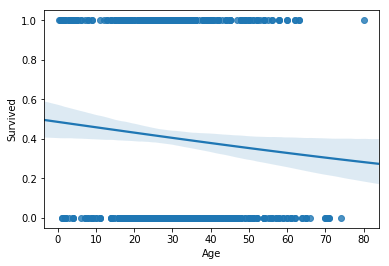

In [28]:
sns.regplot(x='Age', y='Survived', data=df, logistic=True)

#### Replacing Null Values

In [29]:
df["Age_Fill_Med"] = df["Age"].fillna(df["Age"].median())

In [30]:
df["Age_Fill_1"] = df["Age"].fillna(df["Age"].median())

In [31]:
df["Age_Fill_0"] = df["Age"].fillna(0)

In [32]:
df["Age_Fill_-1"] = df["Age"].fillna(-1)

In [33]:
df['Age_Null'] = np.where(df['Age'].isnull(), 1, 0)

#### Creating Dummy Variables (Embarked and Sex)

In [34]:
from sklearn import preprocessing

In [35]:
df = pd.get_dummies(df,columns=['Embarked','Sex'],drop_first=True)

In [49]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'age_bin', 'Title', 'New_Title', 'Age2',
       'Age_Fill_Med', 'Age_Fill_1', 'Age_Fill_0', 'Age_Fill_-1', 'Age_Null',
       'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')

In [36]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,New_Title,Age2,Age_Fill_Med,Age_Fill_1,Age_Fill_0,Age_Fill_-1,Age_Null,Embarked_Q,Embarked_S,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,...,Mr.,22.0,22.0,22.0,22.0,22.0,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,Mrs.,38.0,38.0,38.0,38.0,38.0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,Miss.,26.0,26.0,26.0,26.0,26.0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,Mrs.,35.0,35.0,35.0,35.0,35.0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,...,Mr.,35.0,35.0,35.0,35.0,35.0,0,0,1,1
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,...,Mr.,30.0,28.0,28.0,0.0,-1.0,1,1,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,...,Mr.,54.0,54.0,54.0,54.0,54.0,0,0,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,...,Master.,2.0,2.0,2.0,2.0,2.0,0,0,1,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,...,Mrs.,27.0,27.0,27.0,27.0,27.0,0,0,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,...,Mrs.,14.0,14.0,14.0,14.0,14.0,0,0,0,0


In [37]:
le = preprocessing.LabelEncoder()
le.fit(["C", "Q", "S"])

LabelEncoder()

In [38]:
list(le.classes_)

['C', 'Q', 'S']

# Random Forest Classifier


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [60]:
y = df['Survived']

X = df[['Age_Fill_1','Pclass','Sex_male','Fare', 'family_members']]

X1 = df[['Age2','Pclass','Sex_male','Fare']]


#### Random Forest Model and Cross Validation

In [73]:
# Original Random Forest with Eyal
rf = RandomForestClassifier(n_estimators=20,random_state=0)

# # Random Forest with Null Ages replaced with Mean of Age
s1 = cross_val_score(rf,X,y,cv=10)

s2 = cross_val_score(rf,X1,y,cv=10)

print('X: '+'{:.2f}% +- {:.2f}%'.format(100*np.mean(s1),100*np.std(s1)))
print('X1: '+'{:.2f}% +- {:.2f}%'.format(100*np.mean(s2),100*np.std(s2)))

X: 81.38% +- 4.09%
X1: 80.81% +- 4.09%


In [42]:
print('Nulls to Mean: '+'{:.2f}% +- {:.2f}%'.format(100*np.mean(s1),100*np.std(s1)))
print('Nulls to Median: '+'{:.2f}% +- {:.2f}%'.format(100*np.mean(s2),100*np.std(s2)))

Nulls to Mean: 83.29% +- 4.03%
Nulls to Median: 83.18% +- 4.07%


#### Randomized Grid Search

In [65]:
X.shape

(891, 5)

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from time import time
from scipy.stats import randint as sp_randint

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            

In [74]:
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1,5),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "n_estimators": sp_randint(10,100)}

# run randomized search
n_iter_search = 30
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 15.40 seconds for 30 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.842 (std: 0.030)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_split': 10, 'n_estimators': 94}

Model with rank: 2
Mean validation score: 0.836 (std: 0.025)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_split': 8, 'n_estimators': 47}

Model with rank: 3
Mean validation score: 0.832 (std: 0.022)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 4, 'min_samples_split': 6, 'n_estimators': 31}



In [76]:
random_search.best_estimator_.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=94, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [77]:
random_search.best_estimator_.predict(X)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [44]:
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [46]:
rf.predict(X)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [62]:
# run rf.predict() on the same columns as train data but using the test data once transformations are complete

In [47]:
pd.DataFrame(rf.feature_importances_, index = X.columns, columns = ['Feature Importance']).sort_values(by = 'Feature Importance', ascending = False)

,Feature Importance
Sex_male,0.320254
Fare,0.310714
Age_Fill_1,0.256761
Pclass,0.112272
